In [83]:
#Imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [66]:
#reading in the data
insurance=pd.read_csv('C:/Users/admin/Downloads/insurance.csv')

In [67]:
#analysing
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [68]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [69]:
insurance['smoker']=insurance['smoker'].map({'yes': 1, 'no': 0})

In [70]:
insurance=pd.get_dummies(insurance, columns=['sex'],drop_first=True)

In [71]:
correlations =insurance.corr()
print(correlations['charges'])

age         0.299008
bmi         0.198341
children    0.067998
smoker      0.787251
charges     1.000000
sex_male    0.057292
Name: charges, dtype: float64


We can see that smoker is very correlated with the target. Bmi and age are a little bit correlated. I would drop the sex and the children column that seem to not be correlated with the target

In [72]:
insurance=insurance.drop(['children','sex_male','region'], axis=1)

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

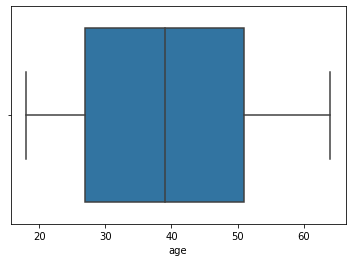

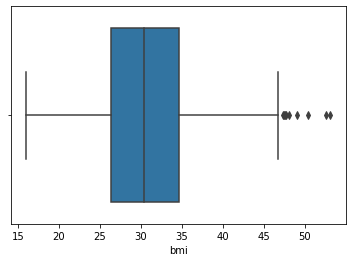

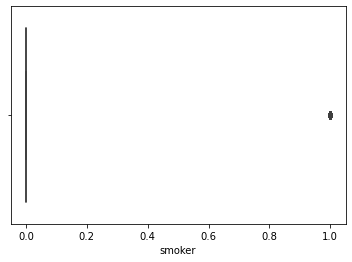

In [73]:
#boxplot for relevant columns
for col in ['age','bmi','smoker']:
    sns.boxplot(x=insurance[col])
    plt.show()

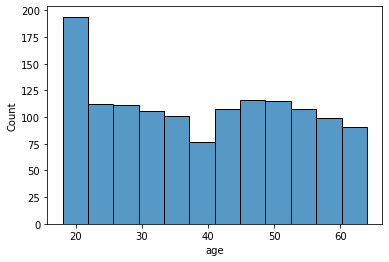

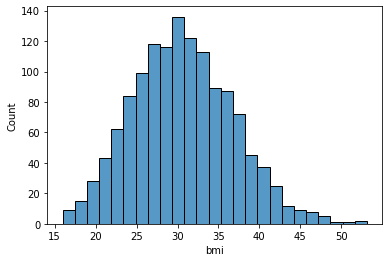

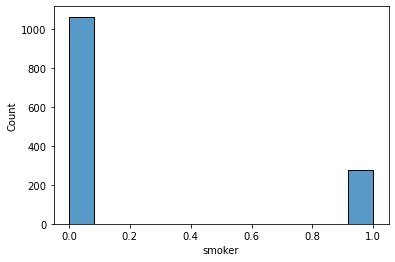

In [75]:
#histplot for relevant columns
for col in ['age','bmi','smoker']:
    sns.histplot(data=insurance,x=col)
    plt.show()

We can see that most of the people that are in this insurance company don't smoke. The BMI's 50% falls between 25-35, the rest are between 15-47, and there are some outliers that are higher than 47. The age 50% falls between 27 - 51 and there are no outliers.

In [76]:
#Spliting the data into features and targets
y=insurance['charges']
X=insurance.drop('charges',axis=1)

In [77]:
#Spliting to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15,random_state=217)

In [78]:
#Scalimg the data
mms1=MinMaxScaler()
X_train_scaled=mms1.fit_transform(X_train)
X_test_scaled=mms1.fit_transform(X_test)

In [79]:
#Fitting the model
lr1 = LinearRegression()
lr1.fit(X_train_scaled, y_train)

LinearRegression()

In [80]:

lr1.coef_

array([12284.23080455, 12059.7776249 , 23897.1068082 ])

In [81]:
lr1.score(X_train_scaled, y_train)

0.7454249707854138

The r2 is 0.745. This model didn't predict very high. We should try to improve this model or try another model to get better results.

In [89]:

# Prediction on the training data
predictions = lr1.predict(X_train_scaled)

In [87]:
MSE = mean_squared_error(y_train,predictions)
MSE

37640173.82125938

In [105]:
MAE=mean_absolute_error(y_train, predictions)
RMSE = mean_squared_error(y_train, predictions, squared = False)

The Mse is the difference between the predicted and actual target squared.

In [94]:
residuals=predictions - y_train

Text(0, 0.5, 'Residual')

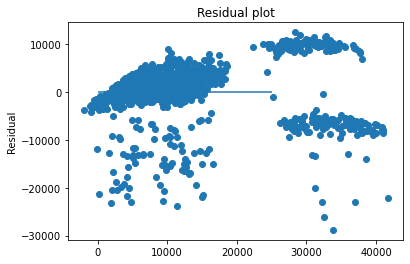

In [95]:
plt.scatter(predictions, residuals)
plt.hlines(y=0, xmin = 0,xmax=25000) 
plt.title('Residual plot')
plt.ylabel('Residual')

When the prediction is high we see that the model predicted around 10,000 off. The lower charges are a little bit better but still have a significant residual error. I don't think that the solution is to change the line but maybe to change the model.

In [96]:
lr1.intercept_

-1989.9939392878714

The y-intercept has no meaning in this case because you can't get all the features to be 0. Therefore, you'll never get that number as a target. The target column cant be a negative number.

In [97]:
lr1.coef_

array([12284.23080455, 12059.7776249 , 23897.1068082 ])

The change of cost for smokers and non-smoking consumers is 23897. For every year in the age, the model predicts 12284 more for the charges

In [98]:
predictions_test = lr1.predict(X_test_scaled)

In [100]:
MSE_test = mean_squared_error(y_test,predictions_test)
MSE_test

34112382.292114355

In [110]:
MAE=mean_absolute_error(y_test, predictions_test)
RMSE = mean_squared_error(y_test, predictions_test, squared = False)
lr1.score(X_test_scaled, y_test)

0.7547745211799988

We would expect the MSE of the testing set to be higher than the MSE in the training set but we got the opposite result. We would have to further check why did this happen and check how to improve this modal or try an other model.